**Exercise set 10**
==============


>The goal of this exercise is to gain familiarity with some
>classification methods and the different ways we can assess and compare them.


**Exercise 10.1**


In this exercise, we will consider the
[UCI ML Breast Cancer Wisconsin (Diagnostic) dataset](https://goo.gl/U2Uwz2).

This data set contains $569$ tumors that have been classified
as malignant or benign. In addition, $30$ variables have been
measured and it is our goal to make a predictive model which
can classify new tumors as being malignant or benign.
An overview of the different variables can be found
on the [`sklearn` website](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset).

In the following, we are going to label the two classes as:

* "benign" as a negative, and

* "malignant" as a positive.


**(a)**  Begin the exercise by loading the raw data, and creating a test set.
Create the test set using 33 % of the available data points for the test set.
The data set itself can be loaded directly from `sklearn`
as follows:


In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data['data']
# "Rename" y so that 0 = benign and 1 = malignant:
y = [0 if i == 1 else 1 for i in data['target']]
class_names = ['benign', 'malignant']
print('Classes:')
print(class_names)

print('Variables:')
print(data['feature_names'])

Classes:
['benign', 'malignant']
Variables:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


The test set can be created by using the method
`train_test_split` which can be found in the module
`sklearn.model_selection`. One of the input parameters to `train_test_split` is
`stratify`. Reading the documentation for [`stratification`](https://scikit-learn.org/stable/modules/cross_validation.html#stratification)
can you explain what this parameter does? And is it important for the data set we
are considering here?

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

data = load_breast_cancer()
X = data['data']
X = scale(X)
# "Rename" y so that 0 = benign and 1 = malignant:
y = [0 if i else 1 for i in data['target']]
class_names = ['benign', 'malignant']
print('Classes:')
print(class_names)

print('Variables:')
print(data['feature_names'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
print(f"Items in training set: {len(y_train)}")
print(f"Items in test set: {len(y_test)}")
print(f"fraction malignant total: {sum(y)/len(y)}")
print(f"fraction malignant train: {sum(y_train)/len(y_train)}")
print(f"fraction malignant test: {sum(y_test)/len(y_test)}")

Classes:
['benign', 'malignant']
Variables:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Items in training set: 381
Items in test set: 188
fraction malignant total: 0.37258347978910367
fraction malignant train: 0.37270341207349084
fraction malignant test: 0.3723404255319149


**Your answer to question 10.1(a):** Stratification makes sure that the distribution of the different classes is the same in the test and training set as it was in the original data set. This is important if the classes in the data set are unevenly distributed. In this case, the number of benign and malignant tumors are not too different, but to be on the safe side, we tell train_test_split to stratify according to the y-values (the class information).

**(b)** In this case, we have to determine what
quantity we are going to use
to compare the different classification methods. Before selecting
what quantity to use, we should consider what false positives and false negatives
mean in our current context. How would you define these two terms in our present
case, and would you say that false positives are a more serious mistake to make
than false negatives?

**Your answer to question 10.1(b):** Here we can make the following interpretations:

- False positive: This is a tumor classified as malignant, but it is in fact benign.
  The seriousness of mistakes like this depends on what we do with samples we believe to be malignant.
  If we, for instance, start treatment based on these results, we would, in this case, treat something
  that we did not need to treat. Depending on the treatment, this can be a serious mistake to make.

- False negative: This is a tumor classified as benign, but it is malignant! Here, we are
  missing potentially dangerous tumors (we think that they are benign!). This is a serious
  mistake to make since it could delay the start of treatment.

Here, I am going to assume that the outcome of the classifier is used to screen for malignant tumors. That is, a positive outcome is followed up by further tests to determine if the tumor is indeed malignant. In such a case we rather have someone be tested extra due to a false positive, than having a delayed diagnosis due to a false negative. I will thus choose to focus on minimizing the false negatives.

**(c)** Following up on the previous question, here
are some possible metrics we could use to assess the performance of a
classifier model we <abbr title="Note: There are other possibilities
as well! If you are curious you can for instance include the
*Accuracy* which is  the ratio of correct predictions
to the number of total predictions.">make:</abbr>


* (i)  Precision: The ratio of true positives to the sum of true positives and false positives.

* (ii)  Recall: The ratio of true positives to the sum of true positives and false negatives.

* (iii)  F1: The (harmonic) mean of the precision and recall.

In addition, we can summarize the performance using the *confusion matrix*.

The choice of the metric for assessing a classifier will lead to different results.
For instance, if we choose to use use the precision as our metric, we will maximize it
during the optimization of our model. This means that we will *minimize* the
number of *false positives*. If we choose to use the recall, on the other hand,
we will *minimize* the number of *false negatives*.


In the following, we will calculate all these metrics for the
different classification methods we consider. At the end of the
exercise, you will be asked to compare the different classifiers
using them. 

But before we do that: Which of the
aforementioned metrics would you say is most important for
the classification task we have here? Base this on your answer to
the previous point.

**Note:** There is no single correct answer here, and it
really depends on how *you* judge the seriousness of false positives vs.
false negatives.

**Your answer to question 10.1(c):** 

As stated in the previous question, I choose to focus on minimizing the number of false negatives. This means that I will pick the **recall** since it will tell us how many of the malignant breast cancer tumors we correctly identified, and optimizing it will minimize the number of false negatives.

Note: We can always get the number of false negatives to be zero by just classifying everything as positive. But this would make the classification pretty useless (we don't even need a classifier to just say that everything is positive!). We will therefore keep an eye on the other scores (precision and F1) to make sure that the number of false positives is not too high.

**(d)**  Create a $k$-nearest neighbor classifier(
This classifier is available from
`sklearn.neighbors.KNeighborsClassifier`
) with $3$ neighbors and
fit it using your training set. Evaluate (with the test set) the classifier using the
precision, recall, and F1 metrics, and plot the confusion matrix.

The different metrics are available in the `sklearn.metrics` module.
Here, there is also a method, `plot_confusion_matrix` which you
can use for plotting the confusion matrix.

How many false positives and false negatives do you get?

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
import pandas as pd

cms = []
classifier_names = []

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X=X_train, y = y_train)
y_hat = classifier.predict(X_test)
score_recall = recall_score(y_test, y_hat)
score_precision = precision_score(y_test, y_hat)
score_f1 = f1_score(y_test, y_hat)
print(sum(y_test))
print(f"Recall score: {score_recall}")
print(f"Precision score: {score_precision}")
print(f"F1 score: {score_f1}")

def conf_matrix(y_test, y_hat, normalize=None):
    cm = confusion_matrix(y_test, y_hat, normalize=normalize)
    index = ['neg', 'pos']
    columns = ['predicted neg', "predicted pos"]
    df = pd.DataFrame(cm, columns=['predicted neg', "predicted pos"], index=['neg', 'pos'])
    
    # Some swapping  and inversing of axis is required to match wikipedia layout
    return df[columns[::-1]].T[index[::-1]]

cm = conf_matrix(y_test, y_hat)
cms.append(cm)
classifier_names.append('Kmeans3')
cm

70
Recall score: 0.8714285714285714
Precision score: 1.0
F1 score: 0.9312977099236641


,pos,neg
predicted pos,61,0
predicted neg,9,118


**Your answer to question 10.1(d):** 

Here (see the confusion matrix above) we got 0 false positives and 9 false negatives. The test set contains 61 + 9 = 70 malignant tumors, and the classifier found 61 of these correctly. But it is not performing great, missing about 12,8% (9 out of 70) of the positive (malignant) tumors.

**(e)**  We will now try to optimize the $k$ for a $k$-nearest neighbor classifier.
This can be done using the method [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

One of the inputs to this method is the `scoring` parameter, which
selects the metric to use for binding the best $k$. Use here the metric
you deemed most important in question **10.1.(c)**.

When using `GridSearchCV`, consider $k$-values in the range $1 \leq k \leq 10$
for your search for the best $k$.

Evaluate the classifier with the best $k$ using
all of the aforementioned metrics (with the test set) and plot the confusion matrix.

What value for $k$ did you find in this case? And did the number of false
positives and false negatives change compared to the non-optimized $k$-nearest neighbor classifier?

In [4]:
from sklearn.model_selection import GridSearchCV
import numpy as np

classifier = KNeighborsClassifier()
parameters = [{'n_neighbors': np.arange(1,11,1)}]
grid = GridSearchCV(classifier,
                    param_grid=parameters,
                    scoring="recall",
                    cv=5,
                    return_train_score=True)
grid.fit(X_train, y_train)
print(f"Best recall score (train): {grid.best_score_}")
print(f"Best k: {grid.best_params_['n_neighbors']}")
best = grid.best_estimator_
y_hat = best.predict(X_test)
print("Best recall score (test):", recall_score(y_test, y_hat))
print("Best precision score (test):", precision_score(y_test, y_hat))
print("Best F1 score (test):", f1_score(y_test, y_hat))
conf_matrix(y_test, y_hat)

Best recall score (train): 0.9366995073891626
Best k: 3
Best recall score (test): 0.8714285714285714
Best precision score (test): 1.0
Best F1 score (test): 0.9312977099236641


,pos,neg
predicted pos,61,0
predicted neg,9,118


**Your answer to question 10.1(e):**

We already guessed the optimal number of k (3) and the number of false positives and negatives do no change.

**(f)**  Create a decision tree classifier (This classifier is available from
`sklearn.tree.DecisionTreeClassifier`) and fit it using your training set. Limit the tree to $3$ levels by setting
the parameter `max_depth=3`.

Evaluate the classifier using the
aforementioned metrics (with the test set) and plot the confusion matrix.

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree3 = DecisionTreeClassifier(max_depth=3)
tree3.fit(X_train, y_train)
y_hat = tree3.predict(X_test)
print("Tree recall score (test):", recall_score(y_test, y_hat))
print("Tree precision score (test):", precision_score(y_test, y_hat))
print("Tree F1 score (test):", f1_score(y_test, y_hat))
cm = conf_matrix(y_test, y_hat)
cms.append(cm)
classifier_names.append('Decision Tree (default)')
cm

Tree recall score (test): 0.7571428571428571
Tree precision score (test): 0.9814814814814815
Tree F1 score (test): 0.8548387096774194


,pos,neg
predicted pos,53,1
predicted neg,17,117


**Your answer to question 10.1(f):**

It performs worse than the k-nearest neighbors classifier!

**(g)**  We will also
try to tune the `DecisionTreeClassifier`
by determining the maximum depth
we should use for the tree. Again, you can use the method
`GridSearchCV` to optimize the parameter
`max_depth` for the `DecisionTreeClassifier`.
Use the metric you deemed most important
in question **10.1(c)** and consider depths
in the range `max_depth = range(1, 21)`, and, in addition,
a depth
where you set `max_depth = None` (this lets the
tree expand as far down as possible).

Evaluate the classifier with the best `max_depth` using the
aforementioned metrics (with the test set) and plot the confusion matrix.

What is the best `max_depth` you find in this case?

In [6]:
classifier = DecisionTreeClassifier(random_state=123)
parameters = [{'max_depth':list(range(1, 21)) + [None]}]
grid = GridSearchCV(classifier,
                    param_grid=parameters,
                    scoring="recall",
                    cv=5,
                    return_train_score=True)
grid.fit(X_train, y_train)
print("Best recall score (train):", grid.best_score_)
print("Best depth:", grid.best_params_['max_depth'])
best = grid.best_estimator_
y_hat = best.predict(X_test)
print("Best recall score (test):", recall_score(y_test, y_hat))
print("Best precision score (test):", precision_score(y_test, y_hat))
print("Best F1 score (test):", f1_score(y_test, y_hat))
cm = conf_matrix(y_test, y_hat)
cms.append(cm)
classifier_names.append('Decision Tree (optimal)')
cm

Best recall score (train): 0.9086206896551726
Best depth: 6
Best recall score (test): 0.8142857142857143
Best precision score (test): 0.9661016949152542
Best F1 score (test): 0.8837209302325583


,pos,neg
predicted pos,57,2
predicted neg,13,116


**Your answer to question 10.1(g):**

6 seems to be the optimal depth of the tree. There is some randomness used in the algorithm for making the decision tree. Above the random state is set to a specified number so that we get the same decision tree each time we run the above code. If we remove this, we will get a different number for the best depth and this number is in fact changing a bit. This indicates that the recall scores are maybe not too different for different depts. Let us inspect how much the recall is changing as a function of the depth:

<IPython.core.display.Javascript object>


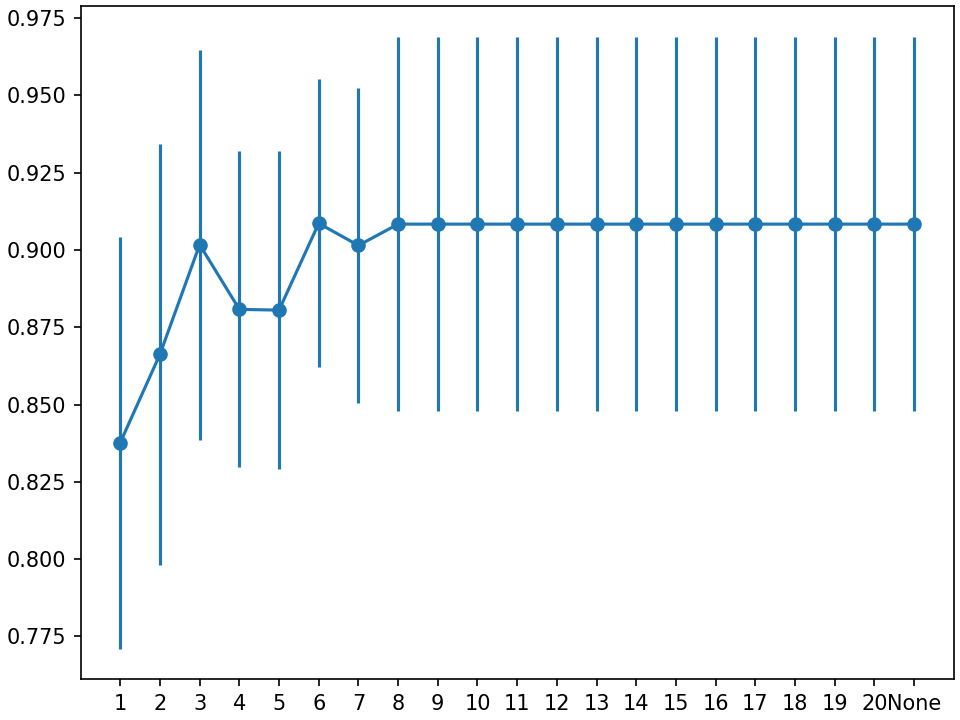

In [7]:
score_mean = grid.cv_results_["mean_test_score"]
score_std = grid.cv_results_["std_test_score"]
depths = [i["max_depth"] for i in grid.cv_results_["params"]]
# Deal with the "None" for plotting
maxdepth = max([i for i in depths if i != None])
depths = [i if i!= None else maxdepth+1 for i in depths]  # "Rename" None to 21, that is, 21 is now max_depth = None
fig, ax = plt.subplots(constrained_layout=True)
ax.errorbar(depths, score_mean, yerr=score_std, marker='o');
ax.set_xticks(depths)
labels = [i if i!= 21 else "None" for i in depths]
ax.set_xticklabels(labels);

We see from the plot above that the recall is not changing much when we go above a depth of 5, so we expect that trees with depths > 5 perform approximately equal. We note that the best tree seems to perform worse than the best k-nearest neighbor classifier.

**(h)**  Visualize the decision tree with 3 levels. This
can be done using the method `export_graphviz`
from `sklearn.tree`, or the method `plot_tree`
from `sklearn.tree`. (Please
see the sklearn [`tree`](https://scikit-learn.org/stable/modules/tree.html) documentation and documentation for using [`export_graphviz`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html).)

In [8]:
from sklearn.tree import plot_tree, export_graphviz
# This might look a bit wonky in jupyter, alternative plotting is given below:
#fig, ax = plt.subplots(constrained_layout=True)
# plot_tree(tree3, feature_names=data['feature_names'], filled=True, class_names=['benign', 'malignant']);

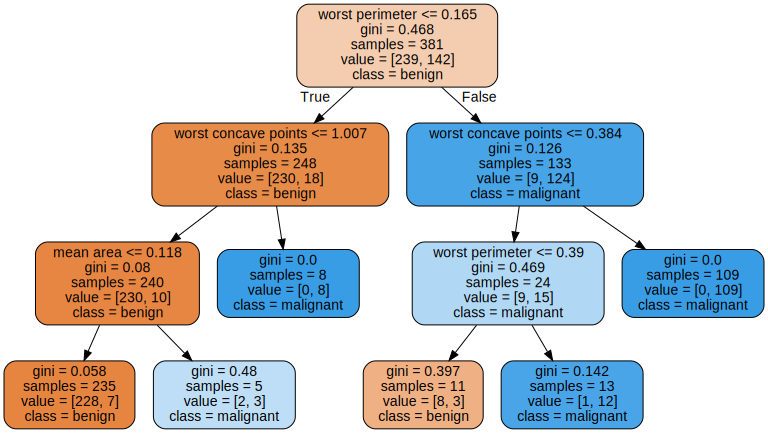

In [9]:
# Alternative for plotting the tree (using graphviz):
import graphviz
dot_data = export_graphviz(
    tree3, out_file=None,
    feature_names=data['feature_names'],
    class_names=['benign', 'malignant'],
    rounded=True,
    filled=True
)
from IPython.display import display
display(graphviz.Source(dot_data))

**Your answer to question 10.1(h):**

Judging from the lowest level in this plot, we see that the classifier has some problems in separating benign for malignant (we arrive at some cases with almost the same number of malignant and benign samples). It appears that the decision tree is not able to beat the k-nearest neighbor classifier here.

**(i)**  Compare the precision, recall, and F1 scores for all
the classifiers you have considered.

If you were to select one
classifier to put into real-life use, which one would you choose and why?

In [10]:
def accuracy(cm):
    acc = cm['pos']['predicted pos'] + cm['neg']['predicted neg']
    acc /= sum(cm['pos'])+sum(cm['neg'])
    return acc

def precision(cm):
    cm = cm.T
    prec = cm['predicted pos']['pos'] / sum(cm['predicted pos'])
    return prec

def recall(cm):
    rec = cm['pos']['predicted pos']
    rec /= sum(cm['pos'])
    return rec

def f1(cm):
    tp = cm['pos']['predicted pos']
    fp = cm['neg']['predicted pos']
    fn = cm['pos']['predicted neg']
    return 2*tp/(2*tp+fp+fn)
    

best_recall = -1
best_name = None
    
for cm, name  in zip(cms, classifier_names):
    print('\n'+name)
    print(f"precision: {precision(cm)}")
    recall_s = recall(cm)
    print(f"recall: {recall_s}")
    print(f"F1: {f1(cm)}")
    if recall_s > best_recall:
        best_recall = recall_s
        best_name = name
        
print(f"\n** Best classifier was {best_name} with a recall = {best_recall} **")


Kmeans3
precision: 1.0
recall: 0.8714285714285714
F1: 0.9312977099236641

Decision Tree (default)
precision: 0.9814814814814815
recall: 0.7571428571428571
F1: 0.8548387096774194

Decision Tree (optimal)
precision: 0.9661016949152542
recall: 0.8142857142857143
F1: 0.8837209302325582

** Best classifier was Kmeans3 with a recall = 0.8714285714285714 **


**Your answer to question 10.1(i):**

Of the classifiers we have considered here, k-nearest neighbors with 3 neighbors seem to perform best (it has better scores for precision, recall, and F1). We would therefore use this one, but we are not completely satisfied (see the question below)!

**(j)**  Extra task for the curious student: Create an alternative classifier, for instance,
using a so-called support vector machine. We will not go into the details about how
this classifier works in our lectures, but with `sklearn` it is rather easy
to just try
it and see what it can do for us. In sklearn this is available as the
object `SVC` from `sklearn.svm`.

There is [an example](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) that will compare several classifiers, and maybe you
can find one that performs better than the ones
we have considered so far in this exercise?

In [11]:
# Let us just try some different classifiers, without optimizing them,
# to see if some can beat the k-nearest neighbor classifier:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

names = ['Naive bayes', 'LDA', 'Support vector machine']

classifiers = [GaussianNB(), LinearDiscriminantAnalysis(), SVC()]
for clf, name in zip(classifiers, names):
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    recall_s = recall_score(y_test, y_hat)
    print(f"\nResults for classifier: {name}")
    print("Recall score (test):", recall_score(y_test, y_hat))
    print("Precision score (test):", precision_score(y_test, y_hat))
    print("F1 score (test):", f1_score(y_test, y_hat))
    if recall_s > best_recall:
        print(f"** Recall score is better than {best_name}! **")


Results for classifier: Naive bayes
Recall score (test): 0.8571428571428571
Precision score (test): 0.967741935483871
F1 score (test): 0.909090909090909

Results for classifier: LDA
Recall score (test): 0.9142857142857143
Precision score (test): 1.0
F1 score (test): 0.955223880597015
** Recall score is better than Kmeans3! **

Results for classifier: Support vector machine
Recall score (test): 0.8857142857142857
Precision score (test): 1.0
F1 score (test): 0.9393939393939393
** Recall score is better than Kmeans3! **


**Your answer to question 10.1(j):**

We see here that some of the classifiers we tried are seemingly performing better. We could now
expand our study and try to find optimized parameters for them to see if we can do even better!

**Exercise 10.2**

Consider again the data set for ovarian cancer and the measured gene expressions (see exercise 9).
Create a decision tree classifier for this data set. Limit the depth of the decision
tree to 2, and visualize the decision tree. How do the "rules" the decision tree
is using for its classification compare to what you found from the PCA analysis?
Does it consider the same genes?

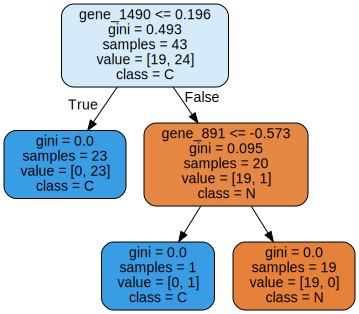

In [12]:
# Load the data:
data_ovo = pd.read_csv('Data/ovo.csv')
classes_ovo = data_ovo['objlabels']
X_ovo = data_ovo.filter(like='X.', axis=1).values
X_ovo = scale(X_ovo, with_std=False)

feature_names_ovo = ['gene_{}'.format(i) for i in range(X_ovo.shape[1])]

y_ovo = [1 if i == 'C' else 0 for i in classes_ovo]
# Create a test and training set:
X_train_ovo, X_test_ovo, y_train_ovo, y_test_ovo = train_test_split(
    X_ovo, y_ovo, test_size=0.2, stratify=y_ovo,
)
tree_ovo = DecisionTreeClassifier(max_depth=2)
tree_ovo.fit(X_train_ovo, y_train_ovo)
dot_data_ovo = export_graphviz(
    tree_ovo, out_file=None,
    feature_names=feature_names_ovo,
    class_names=["N", "C"],
    rounded=True,
    filled=True
)
display(graphviz.Source(dot_data_ovo))

In [13]:
# Score this classifier:
y_hat_ovo = tree_ovo.predict(X_test_ovo)
print("Recall score (test):", recall_score(y_test_ovo, y_hat_ovo))
print("Precision score (test):", precision_score(y_test_ovo, y_hat_ovo))
print("F1 score (test):", f1_score(y_test_ovo, y_hat_ovo))

Recall score (test): 0.6666666666666666
Precision score (test): 1.0
F1 score (test): 0.8


**Your answer to question 10.2:**

In this case, what genes you get will vary due to the randomness in the algorithm making the decision tree classifier. But it will typically pick out some of the genes we found in the previous exercise. Here, we could try many trees and see what genes are picked out most frequently. This is a bit tedious to do by hand, but luckily, there is an approach that will essentially do this. This is called a random forest classifier. For completeness, let use this one and plot the importance of the different genes for making the classification:

<IPython.core.display.Javascript object>


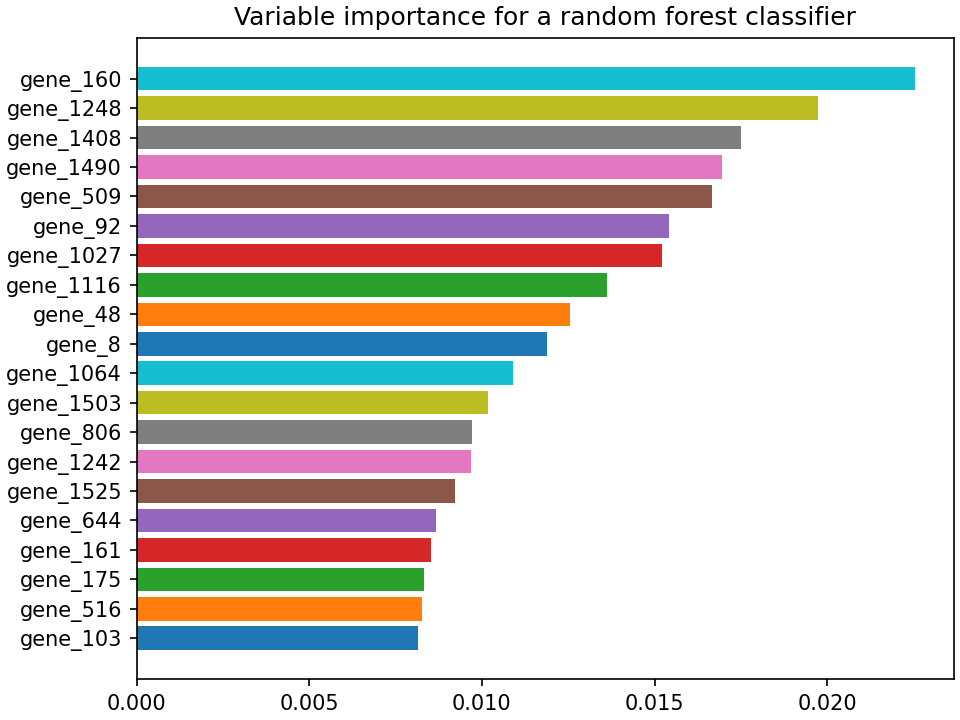

In [14]:
from sklearn.ensemble import RandomForestClassifier
rnd_tree = RandomForestClassifier(max_depth=2, n_estimators=500)  # max depth is 2, and we use 500(!) trees.
rnd_tree.fit(X_train_ovo, y_train_ovo)
# Plot the importance of variables (genes):
importance = rnd_tree.feature_importances_
idx = np.argsort(importance)
y_pos = []
y_label = []
figi, axi = plt.subplots(constrained_layout=True)
for i, idxi in enumerate(idx[-20:]):  # 20 is here to plot the 20 most important ones:
    y_pos.append(i)
    y_label.append(feature_names_ovo[idxi])
    axi.barh(i, importance[idxi], align='center')
axi.set_yticks(y_pos)
axi.set_yticklabels(y_label)
axi.set_title('Variable importance for a random forest classifier');

We see that this analysis picks out many of the genes we found using PCA, for instance, gene 92 or 1490.